In [76]:
import pandas as pd

In [77]:

df = pd.read_csv('needleman.csv')


In [78]:
df


,Refs,Reads
0,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
1,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
2,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
3,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
4,CATTGGAGACTTCTAGCCGTGTCAGATTTTGGGATGAGCATTTGGT...,CATTGGAGACTTCTAGCCGTGTCAGATTTTGGGATGAGCATTTGGT...
...,...,...
8972,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
8973,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
8974,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
8975,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [79]:
from tqdm import tqdm


In [80]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [81]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [82]:
import difflib


In [83]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    a, b = 0, 0

    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now)]
            
            
        
    #print('')


In [84]:
pairs = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 8977/8977 [00:01<00:00, 7750.62it/s]


In [85]:
import numpy as np


In [86]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

In [87]:
# def get_key(char1, char2):
#     char1 = char1 if char1 != '' else '_'
#     char2 = char2 if char2 != '' else '_'
#     return char1 + char2

# pos_map = {}
# for sub, count in zip(subs, counts):
#     key = get_key(sub[0], sub[1])
#     if key not in pos_map:
#         pos_map[key] = [0] * (strand_len + 1)
#     pos_map[key][int(sub[2])] += count

strand_len = 110

pos_counts = [0] * (strand_len + 1)

In [88]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (111,) and (65,)

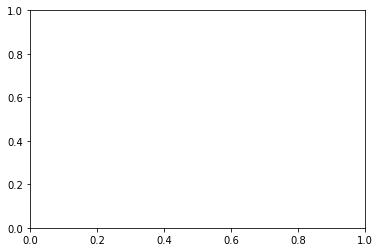

In [90]:
# keys = ['_C', '_T', 'G_', '_G', '_A', 'CT']
# for key in keys:
plt.plot(range(strand_len + 1), counts)

In [ ]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)